# Data transformation

In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# Data handling
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import itertools
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds=pd.read_csv('/home/carmencuadrado/Ironhack/ih_datamadpt0420_project_m2/diamonds_supercleaned.csv')

## Categorizing & simplifying numerical variables

In order to make diamonds dataframe more actionable we categorize **Carat** in gradual increasing steps creating the categorical type column *carat_scale*

In addition, we are going to calculate diamonds volume in order to substitude *x ,y & z* by *volume*

In [3]:
diamonds['carat_scale']=diamonds['carat'].apply(lambda x: "0-0.10" if x>0 and x<=0.10 else("0.10-0.25" if x>0.10 and x<=0.25 else ("0.25-0.50" if x>0.25 and x<=0.50 else ("0.50-0.75" if x>0.50 and x<=0.75 else ("0.75-1" if x>0.75 and x<=1 else ("1-1.25" if x >1 and x<=1.25 else ("1.25-1.50" if x>1.25 and x<=1.50 else ("1.50-1.75" if x>1.50 and x<=1.75 else ("1.75-2" if x>1.75 and x<=2 else ("2-2.5" if x>2 and x<=2.5 else ("2.5-3" if x>2.5 and x<3 else ("3-4" if x>3 and x<=4 else "+4"))))))))))))

## Enriching the dataframe

#### Attributing a cut to each diamond

According to its table, depth and length/width ratio each diamond have a different shape. In order to learn more about the diamonds given in this sample, we are going to infer its shape applying tha parameters found at diamonds.pro proportion guide. Those who does not fit into any class would be labelled as "fancy" diamonds

These are the different shapes present in the diamonds sample:

In [4]:
#Web scrapping 
url='https://www.diamonds.pro/guides/diamond-proportion/'
html = requests.get(url).content
soup = BeautifulSoup(html, 'lxml')
diamonds_proportions = soup.find_all('td')
x=diamonds_proportions[10:]

#Adapting what has been scrapped
split = 6
x = [x[i:i + split] for i in range(0, len(x), split)]

lista=[]
for i in range(0, len(x)):
    lista.append(x[i][0])
    lista.append(x[i][1])
    lista.append(x[i][2])
    lista.append(x[i][5])
    
lista2=[]
for i in lista:
    i=re.sub('\<.*?>','',str(i))
    x=re.sub('–\xa0','',str(i))
    x=re.sub('%','',str(i))
    lista2.append(x)
    
lista3=[]
s=4
lista3=[lista2[i:i + s] for i in range(0,len(lista2),s)]

lista4=[]
for i in range(0,len(lista3)):
    lista4.append(lista3[i][0])
    x=re.split('–|;|to',str(lista3[i][1]))
    for a in x:
        lista4.append(a)
    y=re.split('–|;|to',str(lista3[i][2]))
    for b in y:
        lista4.append(b)
    z=re.split('–|;|to',str(lista3[i][3]))
    for c in z:
        lista4.append(c)

lista5=[]
for i in lista4:
    i=re.sub('\xa0','',str(i))
    x=re.sub('&lt','',str(i))
    g=re.sub('\([a-z].*', '', str(x))
    lista5.append(g)
    
lista5=[i for i in lista5 if i]

lista6=[]
sp=7
a=[lista5[0:35][i:i +sp] for i in range(0,len(lista5[0:35]),sp)]
spl=6
b=[lista5[35:47][i:i +spl] for i in range(0,len(lista5[35:47]),spl)]
c=[lista5[47:54][i:i +sp] for i in range(0,len(lista5[47:54]),sp)]
d=lista5[54:60]
e=lista5[60:]

for i in a:
    lista6.append(i)
for i in b:
    lista6.append(i)
for i in c:
    lista6.append(i)
lista6.append(d)
lista6.append(e)

#Creating a parameter that would help us to identify diamonds' shape
diamonds['L/Wratio']=diamonds['x']/diamonds['y']

#stablishing the conditions of each shape
a=lista6[0]
b=lista6[1]
c=lista6[2]
d=lista6[3]
e=lista6[4]
f=lista6[5]
g=lista6[6]
h=lista6[7]
i=lista6[8]
j=lista6[9]


round1=diamonds['depth']>=float(a[1])
round2=diamonds['depth']<=float(a[2])
round3=diamonds['table']>=float(a[3])
round4=diamonds['table']<=float(a[4])
round5=diamonds['L/Wratio']>=float(a[5])
round6=diamonds['L/Wratio']<=float(a[6])
r=diamonds[round1&round2&round3&round4&round5&round6]

princess1=diamonds['depth']>=float(b[1])
princess2=diamonds['depth']<=float(b[2])
princess3=diamonds['table']>=float(b[3])
princess4=diamonds['table']<=float(b[4])
princess5=diamonds['L/Wratio']>=float(b[5])
princess6=diamonds['L/Wratio']<=float(b[6])
p=diamonds[princess1&princess2&princess3&princess4&princess5&princess6]

cushion1=diamonds['depth']>=float(c[1])
cushion2=diamonds['depth']<=float(c[2])
cushion3=diamonds['table']<=float(c[3])
cushion5=diamonds['L/Wratio']>=float(c[4])
cushion6=diamonds['L/Wratio']<=float(c[5])
cs=diamonds[cushion1&cushion2&cushion3&cushion5&cushion6]

cushion7=diamonds['L/Wratio']>=1.15
cushion8=diamonds['L/Wratio']<=float(c[6])
cu=diamonds[cushion1&cushion2&cushion3&cushion7&cushion8]

emerald=diamonds['depth']>=float(d[1])
emerald2=diamonds['depth']<=float(d[2])
emerald3=diamonds['table']>=float(d[3])
emerald4=diamonds['table']<=float(d[4])
emerald5=diamonds['L/Wratio']>=float(d[5])
emerald6=diamonds['L/Wratio']<=float(d[6])
em=diamonds[emerald&emerald2&emerald3&emerald4&emerald5&emerald6]

asscher=diamonds['depth']>=float(e[1])
asscher2=diamonds['depth']<=float(e[2])
asscher3=diamonds['table']>=float(e[3])
asscher4=diamonds['table']<=float(e[4])
asscher5=diamonds['L/Wratio']>=float(e[5])
asscher6=diamonds['L/Wratio']<=float(e[6])
ass=diamonds[asscher&asscher2&asscher3&asscher4&asscher5&asscher6]

oval=diamonds['depth']<=float(f[1])
oval3=diamonds['table']>=float(f[2])
oval4=diamonds['table']<=float(f[3])
oval5=diamonds['L/Wratio']>=float(f[4])
oval6=diamonds['L/Wratio']<=float(f[5])
o=diamonds[oval&oval3&oval4&oval5&oval6]

pear=diamonds['depth']<=float(g[1])
pear3=diamonds['table']>=float(g[2])
pear4=diamonds['table']<=float(g[3])
pear5=diamonds['L/Wratio']>=float(g[4])
pear6=diamonds['L/Wratio']<=float(g[5])
pe=diamonds[pear&pear3&pear4&pear5&pear6]

radiant=diamonds['depth']<=float(h[1])
radiant3=diamonds['table']>=float(h[2])
radiant4=diamonds['table']<=float(h[3])
radiant5=diamonds['L/Wratio']>=float(h[4])
radiant6=diamonds['L/Wratio']<=float(h[5])
ra=diamonds[radiant&radiant3&radiant4&radiant5&radiant6]

radiant1=diamonds['depth']<=float(h[1])
radiant13=diamonds['table']>=float(h[2])
radiant14=diamonds['table']<=float(h[3])
radiant15=diamonds['L/Wratio']>=1.20
radiant16=diamonds['L/Wratio']<=float(h[6])
rad=diamonds[radiant1&radiant13&radiant14&radiant15&radiant16]

heart=diamonds['depth']>=float(i[1])
heart2=diamonds['depth']<=float(i[2])
heart3=diamonds['table']>=float(i[3])
heart4=diamonds['table']<=float(i[4])
heart5=diamonds['L/Wratio']==float(i[5])
he=diamonds[heart&heart2&heart3&heart4&heart5]

marquise=diamonds['depth']>=float(j[1])
marquise2=diamonds['depth']<=float(j[2])
marquise3=diamonds['table']>=float(j[3])
marquise4=diamonds['table']<=float(j[4])
marquise5=diamonds['L/Wratio']>=float(j[5])
marquise6=diamonds['L/Wratio']<=float(j[6])
m=diamonds[marquise&marquise2&marquise3&marquise4&marquise5&marquise6]

diamonds['shape']=np.where(diamonds.index.isin(r.index), a[0], 'Fancy')
diamonds.loc[diamonds.index.isin((p.index)), 'shape'] = b[0]
diamonds.loc[diamonds.index.isin((cs.index)), 'shape'] = c[0]
diamonds.loc[diamonds.index.isin((cu.index)), 'shape'] = c[0]
diamonds.loc[diamonds.index.isin((em.index)), 'shape'] = d[0]
diamonds.loc[diamonds.index.isin((ass.index)), 'shape'] = e[0]
diamonds.loc[diamonds.index.isin((o.index)), 'shape'] = f[0]
diamonds.loc[diamonds.index.isin((pe.index)), 'shape'] = g[0]
diamonds.loc[diamonds.index.isin((ra.index)), 'shape'] = h[0]
diamonds.loc[diamonds.index.isin((rad.index)), 'shape'] = h[0]
diamonds.loc[diamonds.index.isin((he.index)), 'shape'] = i[0]
diamonds.loc[diamonds.index.isin((m.index)), 'shape'] = j[0]

diamonds['shape'].unique()

array(['Cushion Cut', 'Fancy', 'Radiant Cut', 'Round Brilliant Cut',
       'Pear Shape', 'Asscher Cut', 'Heart Shape', 'Emerald Cut'],
      dtype=object)

#### Matching each diamonds with a potential client

The following web pages from top luxury jewelry brands reveals the 4Cs standards of each of these top brands. Regarding this information we are going to classify our diamonds according each client standards, attributing a potential client to each of our diamonds. It is important to note that diamonds complying with the standards of the first potential clients, should be accepted by those of the bottom of the list who are less demanding and offer diamonds to a broader public

- Harry Winston: https://www.harrywinston.com/en/our-diamonds
- Cartier: https://www.cartier.com/en-us/collections/engagement/features/cartier-diamonds.html
- Van Cleef & Arpels: No information
- Buccellati:https://buccellati.com/en/4cs?
- Tiffany & Co.: https://www.tiffany.com/engagement/the-tiffany-guide-to-diamonds/
- Graff:https://www.graff.com/bridal/bridal-guides/the-4cs/
- Piaget: https://www.piaget.com/es-es/craftsmanship/diamonds
- Bvlgari: https://www.bulgari.com/en-int/engagement-and-wedding/bridal-jewelry/diamond-guide-gia-certificate.html
- Chopard:https://www.chopard.com/intl/chopard-diamonds

This is the outcome of the classification process:

In [5]:
hw_color=['D','E','F']
hw_clarity=['IF', 'VVS1', 'VVS2']
hw_cut=['Ideal','Premium']

c_color=['D','E','F','G','H']
c_clarity=['IF', 'VVS1', 'VVS2']
c_cut=['Ideal','Premium', 'Very good']

b_color=['D','E','F']
b_clarity=['IF', 'VVS1', 'VVS2']
b_cut=['Ideal','Premium', 'Very good']

t_color=['D','E','F','G','H','I']
t_clarity=['VS2', 'VS1', 'IF', 'VVS1', 'VVS2']
t_cut=['Ideal','Premium']

g_color=['D','E','F','G']
g_clarity=['VS2', 'VS1', 'IF', 'VVS1', 'VVS2']
g_cut=['Ideal','Premium', 'Very good']

p_color=['D','E','F']
p_clarity=['IF', 'VVS1', 'VVS2']
p_cut=['Ideal','Premium', 'Very good', 'Good']

bu_color=['D','E','F','G','H']
bu_clarity=['VS2', 'VS1', 'IF', 'VVS1', 'VVS2']
bu_cut=['Ideal','Premium', 'Very good']

ch_clarity=['VS2', 'VS1', 'IF', 'VVS1', 'VVS2']
ch_color=['D','E','F','G']
ch_cut=['Ideal','Premium']

condiciones = [diamonds.color.isin(hw_color) & diamonds.clarity.isin(hw_clarity) & diamonds.cut.isin(hw_cut),
               diamonds.color.isin(c_color) & diamonds.clarity.isin(c_clarity) & diamonds.cut.isin(c_cut),
               diamonds.color.isin(b_color) & diamonds.clarity.isin(b_clarity) & diamonds.cut.isin(b_cut),
               diamonds.color.isin(t_color) & diamonds.clarity.isin(t_clarity) & diamonds.cut.isin(t_cut),
               diamonds.color.isin(g_color) & diamonds.clarity.isin(g_clarity) & diamonds.cut.isin(g_cut),
               diamonds.color.isin(p_color) & diamonds.clarity.isin(p_clarity) & diamonds.cut.isin(p_cut),
               diamonds.color.isin(bu_color) & diamonds.clarity.isin(bu_clarity) & diamonds.cut.isin(bu_cut),
               diamonds.color.isin(ch_color) & diamonds.clarity.isin(ch_clarity) & diamonds.cut.isin(ch_cut)]
elecciones = ['Harry Winston', 'Cartier','Buccellati','Tiffany & Co', 'Graff','Piaget', 'Bulgari', 'Chopard']
diamonds["Potential Client"] = np.select(condiciones, elecciones, default="Other")

In [6]:
print( 'Potential Clients:', diamonds["Potential Client"].unique())

Potential Clients: ['Other' 'Tiffany & Co' 'Cartier' 'Harry Winston' 'Piaget']


## Ranking diamonds

Now we know and have enrinched our data frame we are ready to rank diamonds according to its quality

Starting sorting by numerical variables, we are going to prioritize by

- Carat_scale
- Volume

In [8]:
diamonds['volume']=diamonds['x']*diamonds['y']*diamonds['z']
diamonds.drop(columns=['x','y','z', 'L/Wratio'], inplace=True)
diamonds['carat_scale'] = pd.Categorical(diamonds['carat_scale'], ["0-0.10","0.10-0.25","0.25-0.50","0.50-0.75","0.75-1","1-1.25","1.25-1.50","1.50-1.75","1.75-2","2-2.5","2.5-3","3-4","+4"])

In [9]:
diamonds.sort_values(['carat_scale','volume'],ascending=(False,False))
diamonds.head()

,carat,cut,color,clarity,depth,table,price,carat_scale,shape,Potential Client,volume
0,1.21,Premium,J,VS2,62.4,58.0,4268,1-1.25,Cushion Cut,Other,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,0.25-0.50,Fancy,Other,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,0.50-0.75,Cushion Cut,Other,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,0.25-0.50,Fancy,Other,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,1-1.25,Fancy,Other,168.429975


Continuing sorting by categorical variables, we are going to prioritize by

- Clarity
- Color
- Cut

In [10]:
diamonds['cut'] = pd.Categorical(diamonds['cut'], ["Fair", "Good","Very Good","Premium","Ideal"])
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], ["I1", "I2","I3","SI1","SI2","VS1","VS2","VVS1","VVS2","IF"])
diamonds['color'] = pd.Categorical(diamonds['color'], ["I","J","H","G","F","E","D"])

In [11]:
diamonds.sort_values(['clarity','color','cut'],ascending=(False,False,False))
diamonds.head()

,carat,cut,color,clarity,depth,table,price,carat_scale,shape,Potential Client,volume
0,1.21,Premium,J,VS2,62.4,58.0,4268,1-1.25,Cushion Cut,Other,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,0.25-0.50,Fancy,Other,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,0.50-0.75,Cushion Cut,Other,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,0.25-0.50,Fancy,Other,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,1-1.25,Fancy,Other,168.429975


In both cases, our sorting methods yield similar dataframes. However, when we sort by price the outcome has nothing to do with a categorization according to diamond quality

In [12]:
diamonds.sort_values('price').head()

,carat,cut,color,clarity,depth,table,price,carat_scale,shape,Potential Client,volume
18369,0.21,Premium,E,SI1,59.8,61.0,326,0.10-0.25,Radiant Cut,Other,34.505856
9779,0.23,Ideal,E,SI2,61.5,55.0,326,0.10-0.25,Fancy,Other,38.202030
18373,0.23,Good,E,VS1,56.9,65.0,327,0.10-0.25,Fancy,Other,38.076885
20959,0.29,Premium,I,VS2,62.4,58.0,334,0.25-0.50,Fancy,Tiffany & Co,46.724580
12081,0.31,Good,J,SI2,63.3,58.0,335,0.25-0.50,Fancy,Other,51.917250


Having a look to the correlation of the new variables volume and L/Wratio to price, we could see how volume has a positively-close-to-one correlation relationship with price while L/Wratio has not a strong correlation. Consecuently, we are going to take volume into consideration for the final sorting, while L/Wratio will be dismissed

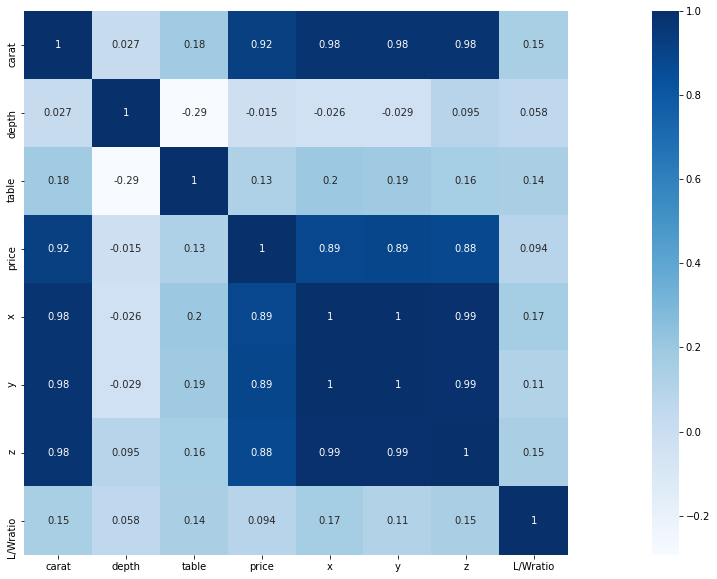

In [7]:
corr=diamonds.corr()
f, ax = plt.subplots(figsize=(30, 10))
ax = sns.heatmap(corr, cmap="Blues", vmax = 1, annot=True, square = True)
plt.show()

In [37]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'carat_scale', 'shape', 'Potential Client', 'volume'],
      dtype='object')

Definitely sorting by numerical & categorical variables in this order:

- Carat_scale
- Clarity
- Color
- Volume
- Cut

In [13]:
diamonds.sort_values(['carat_scale','clarity','color','volume','cut'],ascending=(False,False,False,False,False)).reset_index()
diamonds.head()

,carat,cut,color,clarity,depth,table,price,carat_scale,shape,Potential Client,volume
0,1.21,Premium,J,VS2,62.4,58.0,4268,1-1.25,Cushion Cut,Other,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,0.25-0.50,Fancy,Other,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,0.50-0.75,Cushion Cut,Other,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,0.25-0.50,Fancy,Other,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,1-1.25,Fancy,Other,168.429975


In [38]:
diamonds.to_csv(r'/home/carmencuadrado/Ironhack/ih_datamadpt0420_project_m2/diamonds_result.csv')

In [39]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')